**Importing Required Libraries**






In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**Load the Dataset**



In [3]:
import pandas as pd
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Load datasets from the project directory
training_set = pd.read_csv('dataset/UNSW_NB15_training-set.csv')
testing_set = pd.read_csv('dataset/UNSW_NB15_testing-set.csv')
LIST_EVENTS = pd.read_csv('dataset/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('dataset/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('dataset/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('dataset/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('dataset/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('dataset/NUSW-NB15_features.csv', encoding='cp1252')


Current Working Directory: c:\Users\safac\IDS


C:\Users\safac\AppData\Local\Temp\ipykernel_18744\2752492668.py:11: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv('dataset/UNSW-NB15_1.csv')
C:\Users\safac\AppData\Local\Temp\ipykernel_18744\2752492668.py:12: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv('dataset/UNSW-NB15_2.csv')


Concatenation of the Data

In [4]:
NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

In [5]:
training_set = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [5]:
# Shuffle the data points in train_df
training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)

Feature Importance

             Feature  Importance
39             Label    0.300745
3               sttl    0.178242
1             sbytes    0.089336
29      ct_state_ttl    0.081308
4               dttl    0.045512
16           dmeansz    0.042307
8              Dload    0.035582
10             Dpkts    0.032181
15           smeansz    0.030566
2             dbytes    0.024373
24           Dintpkt    0.021669
7              Sload    0.020606
0                dur    0.016419
27            ackdat    0.014959
25            tcprtt    0.013201
32        ct_srv_src    0.010612
23           Sintpkt    0.009770
33        ct_srv_dst    0.006393
9              Spkts    0.004758
35       ct_src_ ltm    0.003782
37  ct_dst_sport_ltm    0.003016
38    ct_dst_src_ltm    0.002550
26            synack    0.002487
34        ct_dst_ltm    0.001388
36  ct_src_dport_ltm    0.001238
5              sloss    0.001176
11              swin    0.001150
19              Sjit    0.000923
21             Stime    0.000883
20        

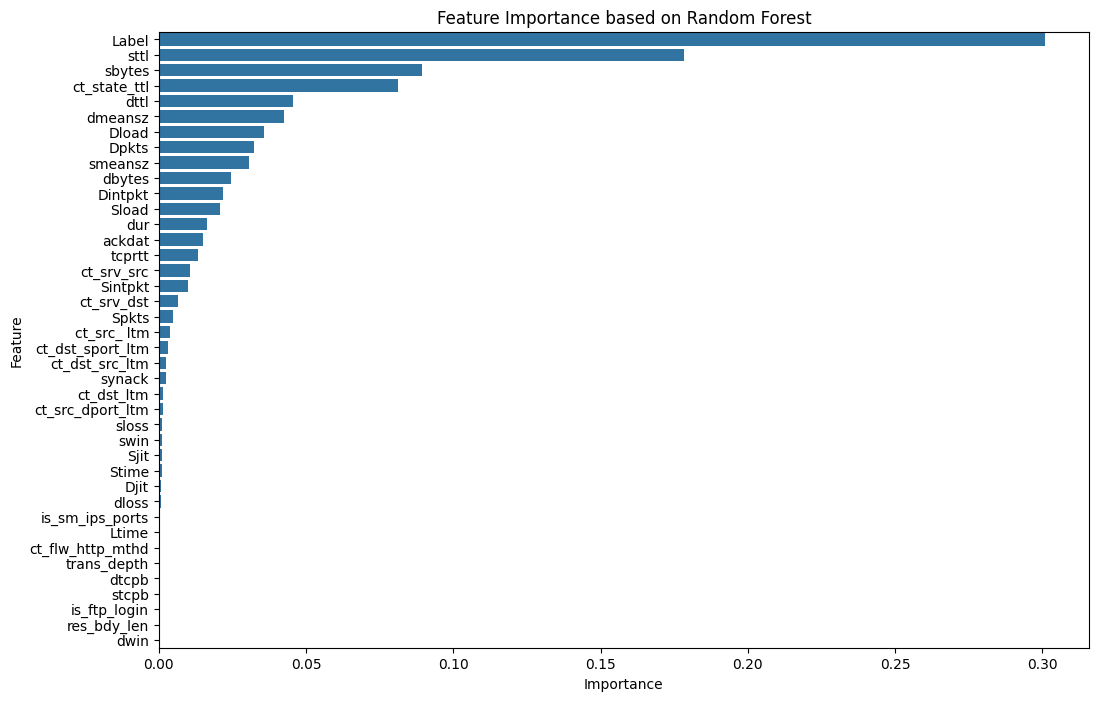

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Select only numeric columns
numeric_columns = training_set.select_dtypes(include=[np.number]).columns
X = training_set[numeric_columns]  # Features

# Check if 'Label' column exists
if 'Label' in training_set.columns:
    y = training_set['Label']  # Target
else:
    raise ValueError("Target column 'Label' not found in the dataset")

# Step 2: Handle missing values (if any) with mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 3: Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Step 4: Train the model
rf_model.fit(X_imputed, y)

# Step 5: Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': numeric_columns,
    'Importance': feature_importances
})

# Step 6: Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Step 7: Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on Random Forest')
plt.show()


seuil=0.005

In [7]:
# Define the threshold for importance
importance_threshold = 0.005

# Filter the features that have an importance greater than the threshold
important_features = importance_df[importance_df['Importance'] > importance_threshold]

# Filter the features that have an importance less than the threshold
Non_important_features = importance_df[importance_df['Importance'] < importance_threshold]

# Print the important features
print("Features with importance greater than {}:".format(importance_threshold))
print(important_features)

# Print the non important features
print("Features with importance less than {}:".format(importance_threshold))
print(Non_important_features)

# Optionally, extract only the feature names
important_feature_names = important_features['Feature'].values
print("\nList of important feature names:")
print(important_feature_names)

Non_important_feature_names = Non_important_features['Feature'].values
print("\nList of non important feature names:")
print(Non_important_feature_names)


Features with importance greater than 0.005:
         Feature  Importance
39         Label    0.300745
3           sttl    0.178242
1         sbytes    0.089336
29  ct_state_ttl    0.081308
4           dttl    0.045512
16       dmeansz    0.042307
8          Dload    0.035582
10         Dpkts    0.032181
15       smeansz    0.030566
2         dbytes    0.024373
24       Dintpkt    0.021669
7          Sload    0.020606
0            dur    0.016419
27        ackdat    0.014959
25        tcprtt    0.013201
32    ct_srv_src    0.010612
23       Sintpkt    0.009770
33    ct_srv_dst    0.006393
Features with importance less than 0.005:
             Feature  Importance
9              Spkts    0.004758
35       ct_src_ ltm    0.003782
37  ct_dst_sport_ltm    0.003016
38    ct_dst_src_ltm    0.002550
26            synack    0.002487
34        ct_dst_ltm    0.001388
36  ct_src_dport_ltm    0.001238
5              sloss    0.001176
11              swin    0.001150
19              Sjit    0.000923

list of important features

In [8]:
important_features_non_numerique=training_set.columns.difference(numeric_columns)
#print(important_features_non_numerique)

important_feature_names = np.concatenate((important_feature_names, important_features_non_numerique))
print(important_feature_names)
print(len(important_feature_names))


['Label' 'sttl' 'sbytes' 'ct_state_ttl' 'dttl' 'dmeansz' 'Dload' 'Dpkts'
 'smeansz' 'dbytes' 'Dintpkt' 'Sload' 'dur' 'ackdat' 'tcprtt' 'ct_srv_src'
 'Sintpkt' 'ct_srv_dst' 'attack_cat' 'ct_ftp_cmd' 'dsport' 'dstip' 'proto'
 'service' 'sport' 'srcip' 'state']
27


In [9]:
# ajouter des features d'aprés la corrélation
new_features = ['tcprtt', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'sloss']

# Convertir le tableau numpy en liste
important_feature_names_list = important_feature_names.tolist()

# Ajouter les nouvelles fonctionnalités
important_feature_names_list.extend(new_features)

# Convertir à nouveau la liste en tableau numpy si nécessaire
final_features = np.array(important_feature_names_list)

# Afficher les fonctionnalités finales
print(final_features)

print(len(final_features))


['Label' 'sttl' 'sbytes' 'ct_state_ttl' 'dttl' 'dmeansz' 'Dload' 'Dpkts'
 'smeansz' 'dbytes' 'Dintpkt' 'Sload' 'dur' 'ackdat' 'tcprtt' 'ct_srv_src'
 'Sintpkt' 'ct_srv_dst' 'attack_cat' 'ct_ftp_cmd' 'dsport' 'dstip' 'proto'
 'service' 'sport' 'srcip' 'state' 'tcprtt' 'ct_dst_ltm' 'ct_src_ltm'
 'ct_src_dport_ltm' 'ct_dst_src_ltm' 'sloss']
33


# Week 3: Data Preparation

1.Update and create the new dataset

In [ ]:
print(training_set.columns.tolist())


['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']


In [10]:
import pandas as pd
import numpy as np

# Assuming you have the `training_set` DataFrame already defined

# Define the final features excluding the 'Label' column
final_features = np.array(['sttl', 'ct_state_ttl', 'sbytes', 'dttl', 'dmeansz', 'Dload',
                           'Dpkts', 'Dintpkt', 'dbytes', 'Sload', 'smeansz', 'dur',
                           'ackdat', 'ct_srv_src', 'Sintpkt', 'synack', 'ct_srv_dst',
                           'ct_ftp_cmd', 'dsport', 'dstip', 'proto', 'service',
                           'sport', 'srcip', 'state', 'tcprtt', 'ct_dst_ltm',
                           'ct_src_dport_ltm', 'ct_dst_src_ltm', 'sloss'])

# Create a new DataFrame with only the selected features
new_dataset = training_set[final_features]

# Separate the target column 'Label'
target = training_set['Label']

# Display the new dataset and target
print("New dataset (features):")
print(new_dataset.head())  # Show the first few rows of the new dataset
print("\nTarget variable (Label):")
print(target.head())       # Show the first few rows of the target variable

# Optionally, if you want to create a final dataset combining both
final_dataset = new_dataset.copy()
final_dataset['Label'] = target  # Add the target column to the new dataset

# Display the final dataset
print("\nFinal dataset:")
print(final_dataset.head())      # Show the first few rows of the final dataset
print(final_dataset.shape)        # Display the shape of the final dataset


New dataset (features):
Name  sttl  ct_state_ttl  sbytes  dttl  dmeansz         Dload  Dpkts  \
0       31             0     528    29       76   50480.17188      4   
1       31             0     146    29       89  636282.37500      2   
2       31             0     132    29       82  542597.18750      2   
3       31             0     146    29       89  609067.56250      2   
4       31             0     568    29       78   23896.14258      4   

Name    Dintpkt  dbytes         Sload  ...  proto  service  sport       srcip  \
0      7.564333     304   87676.08594  ...    udp        -  33661  59.166.0.0   
1      0.013000     178  521894.53130  ...    udp      dns   1464  59.166.0.6   
2      0.014000     164  436724.56250  ...    udp      dns   3593  59.166.0.5   
3      0.003000     178  499572.25000  ...    udp      dns  49664  59.166.0.3   
4     24.315000     312   43503.23438  ...    udp        -  32119  59.166.0.0   

Name  state  tcprtt  ct_dst_ltm ct_src_dport_ltm ct_dst_

1.Data Cleaning:

1.1-Handling the missing values

This code handles missing values in the dataset 'new_dataset'.
 It first prints the total number of missing values per column and the overall total.
Then, it provides two strategies for dealing with missing values:
 1. Remove rows with any missing values 
 2. Fill missing values: 
    - For numeric columns, it replaces missing values with the column's mean.
    - For categorical columns, it replaces missing values with the column's mode.
 Finally, it checks and prints the number of missing values after handling and shows the first few rows of the cleaned dataset.


In [11]:
import pandas as pd
import numpy as np

# Print the total number of missing values in each column for the training set
print("Missing values in training set (per column):\n", new_dataset.isnull().sum())

# Calculate and print the total number of missing values in the training set
total_missing_train = new_dataset.isnull().sum().sum()
print("\nTotal missing values in training set:", total_missing_train)

# Strategy 1: Remove rows with missing values
# Uncomment the following line if you want to drop rows with any missing values
# training_set_cleaned = training_set.dropna()

# Strategy 2: Fill missing values
# Fill numeric columns with the mean
for col in new_dataset.select_dtypes(include=np.number).columns:
    mean_value = new_dataset[col].mean()
    new_dataset[col].fillna(mean_value, inplace=True)

# Fill non-numeric (categorical) columns with the mode
for col in new_dataset.select_dtypes(exclude=np.number).columns:
    mode_value = new_dataset[col].mode()[0]
    new_dataset[col].fillna(mode_value, inplace=True)

# Print the total number of missing values after handling
print("\nMissing values after handling:\n", new_dataset.isnull().sum())

# Calculate and print the total number of missing values remaining
total_missing_after = new_dataset.isnull().sum().sum()
print("\nTotal missing values after handling:", total_missing_after)

# Optional: Verify the first few rows after handling missing values
print("\nTraining set after handling missing values:\n", new_dataset.head())


Missing values in training set (per column):
 Name
sttl                0
ct_state_ttl        0
sbytes              0
dttl                0
dmeansz             0
Dload               0
Dpkts               0
Dintpkt             0
dbytes              0
Sload               0
smeansz             0
dur                 0
ackdat              0
ct_srv_src          0
Sintpkt             0
synack              0
ct_srv_dst          0
ct_ftp_cmd          0
dsport              0
dstip               0
proto               0
service             0
sport               0
srcip               0
state               0
tcprtt              0
ct_dst_ltm          0
ct_src_dport_ltm    0
ct_dst_src_ltm      0
sloss               0
dtype: int64

Total missing values in training set: 0


C:\Users\safac\AppData\Local\Temp\ipykernel_1732\1414324605.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col].fillna(mean_value, inplace=True)
C:\Users\safac\AppData\Local\Temp\ipykernel_1732\1414324605.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col].fillna(mode_value, inplace=True)



Missing values after handling:
 Name
sttl                0
ct_state_ttl        0
sbytes              0
dttl                0
dmeansz             0
Dload               0
Dpkts               0
Dintpkt             0
dbytes              0
Sload               0
smeansz             0
dur                 0
ackdat              0
ct_srv_src          0
Sintpkt             0
synack              0
ct_srv_dst          0
ct_ftp_cmd          0
dsport              0
dstip               0
proto               0
service             0
sport               0
srcip               0
state               0
tcprtt              0
ct_dst_ltm          0
ct_src_dport_ltm    0
ct_dst_src_ltm      0
sloss               0
dtype: int64

Total missing values after handling: 0

Training set after handling missing values:
 Name  sttl  ct_state_ttl  sbytes  dttl  dmeansz          Dload  Dpkts  \
0       62             3     986   252       43    1205.511719      2   
1       31             0    1540    29       91   39527.7

1.2 Outlier Detection

Outliers are data points that differ significantly from other observations in a dataset. Detecting outliers is crucial because they can skew and mislead the interpretation of results. In this section, we will identify outliers using the Interquartile Range (IQR) method. The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. We will classify values as outliers if they fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This approach helps in identifying and addressing any anomalies in our dataset before proceeding with further analysis.



Number of outliers in each numeric column:
 Name
sttl                599347
ct_state_ttl        361862
sbytes              287941
dttl                600080
dmeansz              25587
Dload               344568
Dpkts               150493
Dintpkt             453642
dbytes              301906
Sload               563157
smeansz             169165
dur                 451277
ackdat              125312
ct_srv_src          313946
Sintpkt             446036
synack              111217
ct_srv_dst          310732
tcprtt              112170
ct_dst_ltm          362838
ct_src_dport_ltm    533566
ct_dst_src_ltm      415534
sloss               203862
dtype: int64

Dataset after removing outliers:
 Name     sttl  ct_state_ttl  sbytes  dttl  dmeansz         Dload  Dpkts  \
4          31             0     146    29       89  6.598702e+05      2   
14         31             0    1036    29       82  1.648065e+05     10   
18         31             0     132    29       82  6.514399e+05      2   
20      

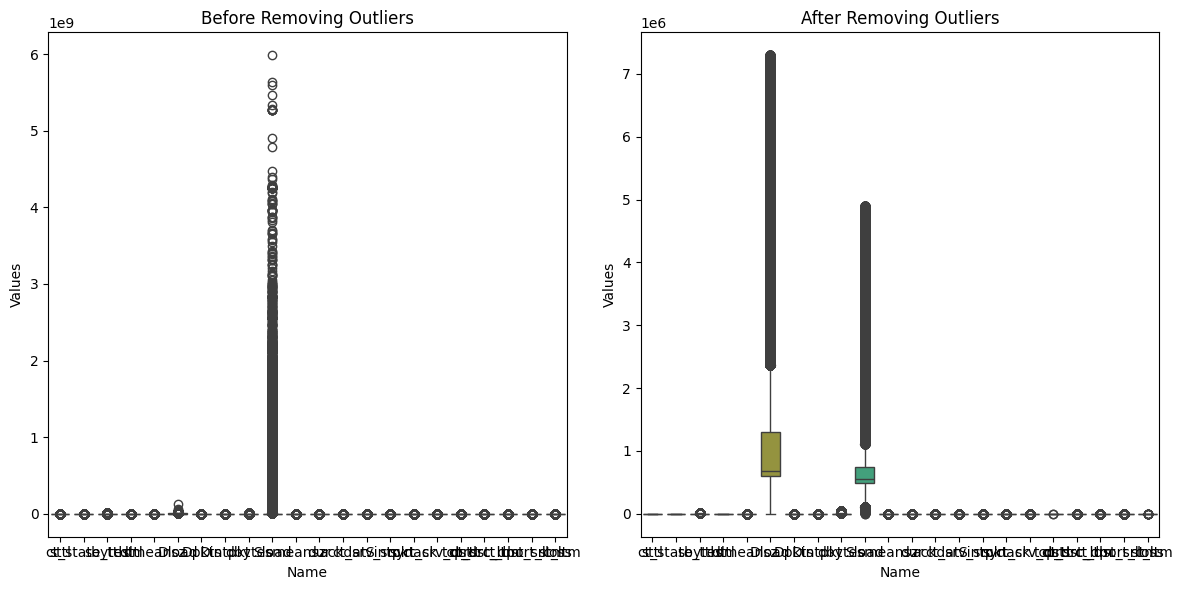

In [17]:
# Calculate the first (Q1) and third (Q3) quartiles for numeric columns only
numeric_data = new_dataset.select_dtypes(include=np.number)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in numeric columns
outliers = (numeric_data < lower_bound) | (numeric_data > upper_bound)

# Print the number of outliers for each numeric column
print("\nNumber of outliers in each numeric column:\n", outliers.sum())

# Remove rows with outliers in numeric columns
cleaned_dataset = new_dataset[~outliers.any(axis=1)]

# Display the cleaned dataset
print("\nDataset after removing outliers:\n", cleaned_dataset)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=new_dataset.select_dtypes(include=np.number))  # Only numeric columns
plt.title('Before Removing Outliers')
plt.ylabel('Values')

# Plotting after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_dataset.select_dtypes(include=np.number))  # Only numeric columns
plt.title('After Removing Outliers')
plt.ylabel('Values')

plt.tight_layout()
plt.show()


2.Feature Engineering

2.1-Encode Categorical variables

we are going to work with One hot Encoding which is a powerful technique used to convert categorical variables into a numerical format suitable for machine learning algorithms.

In [18]:
new_dataset.dtypes

Name
sttl                  int64
ct_state_ttl          int64
sbytes                int64
dttl                  int64
dmeansz               int64
Dload               float64
Dpkts                 int64
Dintpkt             float64
dbytes                int64
Sload               float64
smeansz               int64
dur                 float64
ackdat              float64
ct_srv_src            int64
Sintpkt             float64
synack              float64
ct_srv_dst            int64
ct_ftp_cmd           object
dsport               object
dstip                object
proto                object
service              object
sport                object
srcip                object
state                object
tcprtt              float64
ct_dst_ltm            int64
ct_src_dport_ltm      int64
ct_dst_src_ltm        int64
sloss                 int64
dtype: object

In [19]:
# Convert boolean columns to integers (True -> 1, False -> 0)
bool_cols = new_dataset.select_dtypes(include='bool').columns
new_dataset[bool_cols] = new_dataset[bool_cols].astype('int')

# Function to reduce unique categories
def reduce_categories(df, cols, threshold=0.01):
    """Combine categories with low frequency into 'Other'."""
    for col in cols:
        value_counts = df[col].value_counts(normalize=True)
        other_category = value_counts[value_counts < threshold].index.tolist()
        df[col] = df[col].where(~df[col].isin(other_category), 'Other')
    return df

# Reduce unique categories before one-hot encoding
new_dataset = reduce_categories(new_dataset, new_dataset.select_dtypes(include='object').columns.tolist())

# Select categorical columns that are not already numeric
categorical_cols = new_dataset.select_dtypes(include='object').columns.tolist()

# One-hot encoding on categorical columns using sparse=True
new_dataset_encoded = pd.get_dummies(new_dataset, columns=categorical_cols, drop_first=True, sparse=True)

# Convert the boolean columns in the encoded DataFrame to integers
new_dataset_encoded = new_dataset_encoded.astype({col: 'int' for col in new_dataset_encoded.select_dtypes(include='bool').columns})

# Display the first 5 rows of the new encoded dataset
print("\nNew dataset after one-hot encoding (first 5 rows):\n", new_dataset_encoded.head())

# Check the info of the new dataset to confirm all columns are numeric
print("\nNew dataset info after encoding:\n", new_dataset_encoded.info())

# Confirm all columns are now numeric
print("\nCheck if all columns are numeric:\n", new_dataset_encoded.dtypes)



New dataset after one-hot encoding (first 5 rows):
    sttl  ct_state_ttl  sbytes  dttl  dmeansz         Dload  Dpkts    Dintpkt  \
0    31             0     528    29       76   50480.17188      4   7.564333   
1    31             0     146    29       89  636282.37500      2   0.013000   
2    31             0     132    29       82  542597.18750      2   0.014000   
3    31             0     146    29       89  609067.56250      2   0.003000   
4    31             0     568    29       78   23896.14258      4  24.315000   

   dbytes         Sload  ...  srcip_59.166.0.4  srcip_59.166.0.5  \
0     304   87676.08594  ...                 0                 0   
1     178  521894.53130  ...                 0                 0   
2     164  436724.56250  ...                 0                 1   
3     178  499572.25000  ...                 0                 0   
4     312   43503.23438  ...                 0                 0   

   srcip_59.166.0.6  srcip_59.166.0.7  srcip_59.166.0.8  

In [22]:
new_dataset=new_dataset_encoded

3-Normalization and Standardization


In this section of the code, we apply Robust Scaling to the numeric features of our dataset. Robust Scaling is a normalization technique that centers the data using the median and scales it according to the interquartile range (IQR). This method is particularly beneficial when dealing with datasets that may contain outliers, as it reduces their influence on the scaling process.

In [28]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


# Separate numeric columns
df_numeric = new_dataset.select_dtypes(include=[np.number])

# Create a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the numeric data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

# Check for shape and columns before assignment
print("Shape of original numeric data:", df_numeric.shape)
print("Shape of scaled numeric data:", df_scaled.shape)

# Replace the numeric columns in the original dataset with the scaled values
for col in df_scaled.columns:
    new_dataset[col] = df_scaled[col]

# Display the standardized numeric features
print("\nStandardized numeric features:\n", new_dataset[df_numeric.columns].head())



Shape of original numeric data: (2540043, 92)
Shape of scaled numeric data: (2540043, 92)

Standardized numeric features:
    sttl  ct_state_ttl    sbytes  dttl   dmeansz     Dload  Dpkts   Dintpkt  \
0   0.0           0.0 -0.315895   0.0 -0.026210 -0.184912  -0.20  1.153876   
1   0.0           0.0 -0.443997   0.0  0.000000  0.016117  -0.25 -0.064839   
2   0.0           0.0 -0.448692   0.0 -0.014113 -0.016033  -0.25 -0.064678   
3   0.0           0.0 -0.443997   0.0  0.000000  0.006777  -0.25 -0.066453   
4   0.0           0.0 -0.302482   0.0 -0.022177 -0.194034  -0.20  3.857277   

     dbytes     Sload  ...  srcip_59.166.0.4  srcip_59.166.0.5  \
0 -0.103017 -0.263387  ...               0.0               0.0   
1 -0.111579 -0.035394  ...               0.0               0.0   
2 -0.112531 -0.080114  ...               0.0               1.0   
3 -0.111579 -0.047115  ...               0.0               0.0   
4 -0.102473 -0.286581  ...               0.0               0.0   

   srcip_59

4-Handling Class Imbalance and Visualizing Results

In this section, we focused on addressing class imbalance in our dataset to improve the performance of machine learning models. We employed the Random Oversampling technique from the imblearn library to create a balanced dataset by duplicating instances of the minority class. This approach helps prevent models from being biased toward the majority class and enhances their ability to generalize.

In [35]:
pip install imbalanced-learn


In [44]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assume new_dataset has only the features and target has the labels
X = new_dataset  # Your feature dataset
y = target  # Your target labels

# Define batch size
batch_size = 10000  # Adjust based on your memory capacity
batches = []

# Initialize Random Oversampler
ros = RandomOverSampler(random_state=42)

# Process the dataset in batches
for i in range(0, len(X), batch_size):
    X_batch = X.iloc[i:i + batch_size]
    y_batch = y.iloc[i:i + batch_size]

    # Print batch information
    print(f"Processing batch {i // batch_size + 1}/{(len(X) + batch_size - 1) // batch_size}")

    # Check if y_batch has more than one class
    if len(y_batch.unique()) > 1:
        # Apply Random Oversampling
        X_resampled, y_resampled = ros.fit_resample(X_batch, y_batch)

        # Create a DataFrame for the balanced batch
        balanced_batch = pd.DataFrame(X_resampled, columns=X_batch.columns)
        balanced_batch['Label'] = y_resampled
        batches.append(balanced_batch)
    else:
        # If only one class is present, just append the original batch with its label
        balanced_batch = X_batch.copy()
        balanced_batch['Label'] = y_batch
        batches.append(balanced_batch)

# Concatenate all batches into a single DataFrame
balanced_training_set = pd.concat(batches, ignore_index=True)

# Display the class distribution
print("Class distribution in the balanced training set:")
print(balanced_training_set['Label'].value_counts())


Processing batch 1/255
Processing batch 2/255
Processing batch 3/255
Processing batch 4/255
Processing batch 5/255
Processing batch 6/255
Processing batch 7/255
Processing batch 8/255
Processing batch 9/255
Processing batch 10/255
Processing batch 11/255
Processing batch 12/255
Processing batch 13/255
Processing batch 14/255
Processing batch 15/255
Processing batch 16/255
Processing batch 17/255
Processing batch 18/255
Processing batch 19/255
Processing batch 20/255
Processing batch 21/255
Processing batch 22/255
Processing batch 23/255
Processing batch 24/255
Processing batch 25/255
Processing batch 26/255
Processing batch 27/255
Processing batch 28/255
Processing batch 29/255
Processing batch 30/255
Processing batch 31/255
Processing batch 32/255
Processing batch 33/255
Processing batch 34/255
Processing batch 35/255
Processing batch 36/255
Processing batch 37/255
Processing batch 38/255
Processing batch 39/255
Processing batch 40/255
Processing batch 41/255
Processing batch 42/255
P

Class distribution in the balanced training set:
Label
0    2221682
1    1331682
Name: count, dtype: int64


C:\Users\safac\AppData\Local\Temp\ipykernel_18744\2857825889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


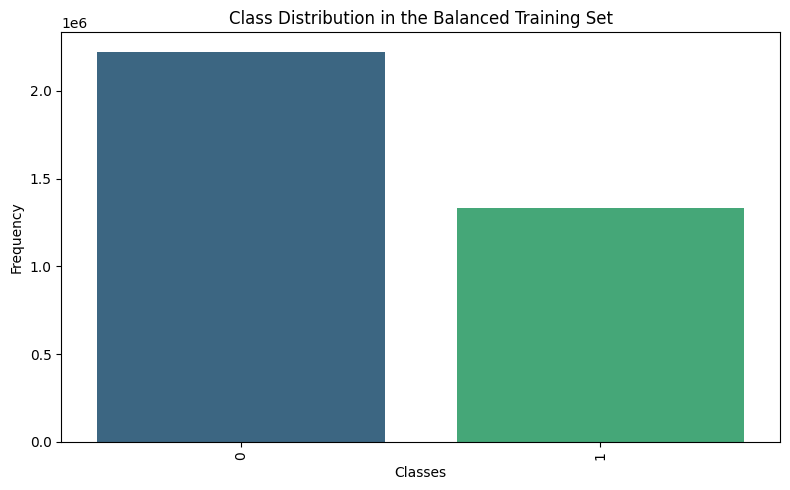

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `balanced_training_set` is already created from the previous code

# Display the class distribution
class_distribution = balanced_training_set['Label'].value_counts()
print("Class distribution in the balanced training set:")
print(class_distribution)

# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution in the Balanced Training Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


5-Splitting the data for modeling

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume new_dataset has only the features and target has the labels
X = new_dataset  # Your feature dataset
y = target  # Your target labels

# Split the data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Now split the temporary set into validation and testing (50% of temp = 15% of original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 1778030
Validation set size: 381006
Testing set size: 381007
